In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from joblib import dump, load
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [2]:
# Getting the data
heart_disease = pd.read_csv("data/heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
len(heart_disease)

303

In [4]:
# Clearning the data
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Splitting data into 2 segments of train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [5]:
len(X_train), len(X_test)

(242, 61)

In [6]:
# Instantiate the model
clf = RandomForestClassifier().fit(X_train, y_train)

# Test data on known datasets
clf.score(X_train, y_train)

1.0

In [7]:
# Test data on unknown datasets
clf.score(X_test, y_test)

0.8360655737704918

In [ ]:
# Save model
dump(clf, "research.joblib")

In [8]:
# Load the saved model
saved_clf = load("research.joblib")
clf.score(X_test, y_test)

0.8360655737704918

In [9]:
# Get predictions
y_pred = clf.predict(X_test)

In [10]:
# Reindex the new dataframe created from unseen data
new_df = pd.DataFrame(X_test.reset_index(drop=True))
new_df["target"] = pd.Series(y_pred)

In [11]:
new_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0
1,67,0,2,152,277,0,1,172,0,0.0,2,1,2,1
2,65,0,2,155,269,0,1,148,0,0.8,2,0,2,1
3,58,0,0,170,225,1,0,146,1,2.8,1,2,1,0
4,52,1,3,152,298,1,1,178,0,1.2,1,0,3,0


In [12]:
len(new_df)

61

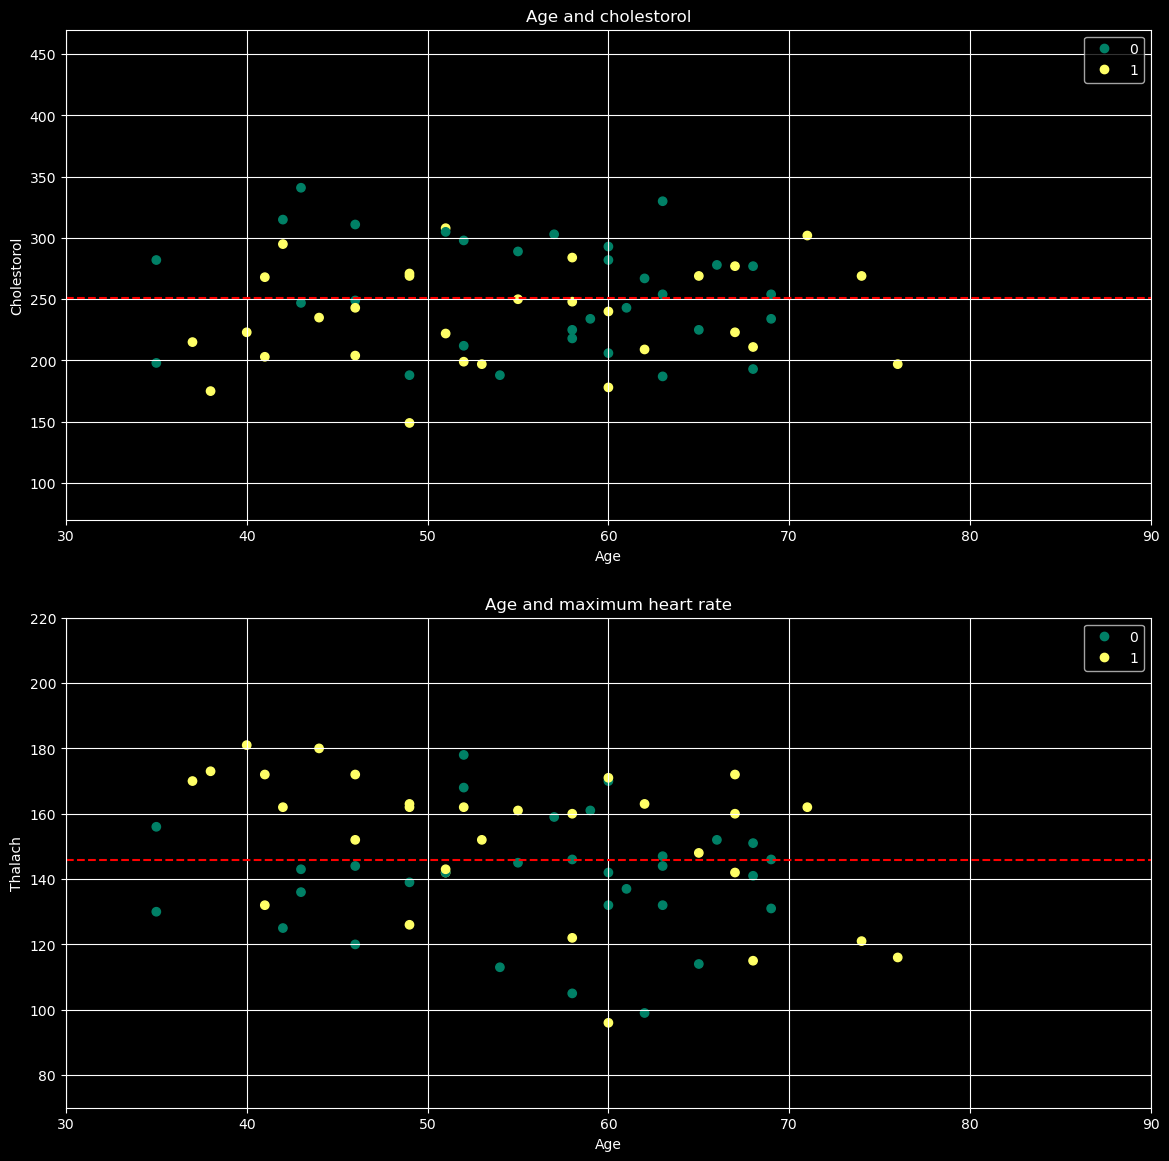

In [13]:
# Plot the new data

plt.style.use('dark_background')

fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(14, 14))
ax1_scatter = ax1.scatter(new_df["age"], new_df["chol"], c=new_df["target"], cmap="summer")
ax1.set(xlabel="Age", ylabel="Cholestorol", 
        title="Age and cholestorol",
       xlim=[30, 90], ylim=[70, 470])
ax1.legend(*ax1_scatter.legend_elements())
ax1.grid()
ax1.axhline(new_df["chol"].mean(), linestyle="--", c="red")

ax2_scatter = ax2.scatter(new_df["age"], new_df["thalach"], c=new_df["target"], cmap="summer")
ax2.set(xlabel="Age", ylabel="Thalach", title="Age and maximum heart rate",
       xlim=[30, 90], ylim=[70, 220])
ax2.legend(*ax2_scatter.legend_elements())
ax2.grid()
ax2.axhline(new_df["thalach"].mean(), linestyle="--", c="red");

# Regression model

In [29]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

In [30]:
cali_fetch = fetch_california_housing()
df = pd.DataFrame(cali_fetch["data"], columns=cali_fetch["feature_names"])
df["target"] = pd.Series(cali_fetch["target"])
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [16]:
len(df)

20640

In [17]:
X = df.drop("target", axis=1)
y = df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
model = RandomForestRegressor().fit(X_train, y_train)
model.score(X_train, y_train)

0.9732753545289305

In [18]:
model.score(X_test, y_test)

0.8067981441569789

In [19]:
new_df = pd.DataFrame(X_test.reset_index(drop=True))
new_df["target"] = pd.Series(model.predict(X_test))

In [20]:
new_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,2.2500,24.0,6.044872,1.339744,514.0,3.294872,36.65,-120.31,0.94706
1,5.0509,5.0,5.333333,1.002950,825.0,2.433628,37.26,-121.84,2.47086
2,3.0061,40.0,3.952471,1.079848,1396.0,2.653992,34.18,-118.38,2.00532
3,4.0417,34.0,7.040816,1.214286,784.0,2.666667,37.96,-122.32,1.87460
4,3.3067,17.0,4.849181,1.032746,7302.0,2.299118,32.83,-117.01,1.64242


In [21]:
from sklearn.neural_network import MLPRegressor

In [22]:
ml_clf = MLPRegressor(max_iter=1000).fit(X_train, y_train)
ml_clf.score(X_train, y_train)

0.12677334973051257

In [23]:
ml_clf.score(X_test, y_test)

0.24952955935236654

In [31]:
second_df = df[:500]

In [ ]:
plt.style.available

In [ ]:
plt.style.use('seaborn-v0_8-whitegrid')

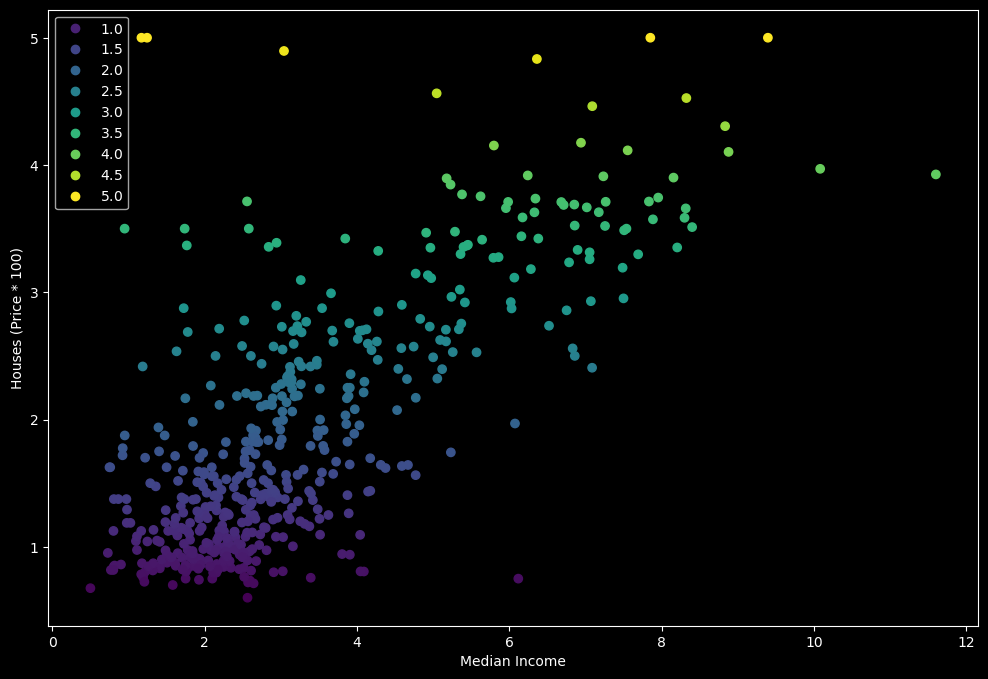

In [32]:
_, ax = plt.subplots(figsize=(12, 8));
ax_scatter = ax.scatter(second_df["MedInc"], second_df["target"], c=second_df["target"])
ax.legend(*ax_scatter.legend_elements())
ax.set(xlabel="Median Income", ylabel="Houses (Price * 100)");

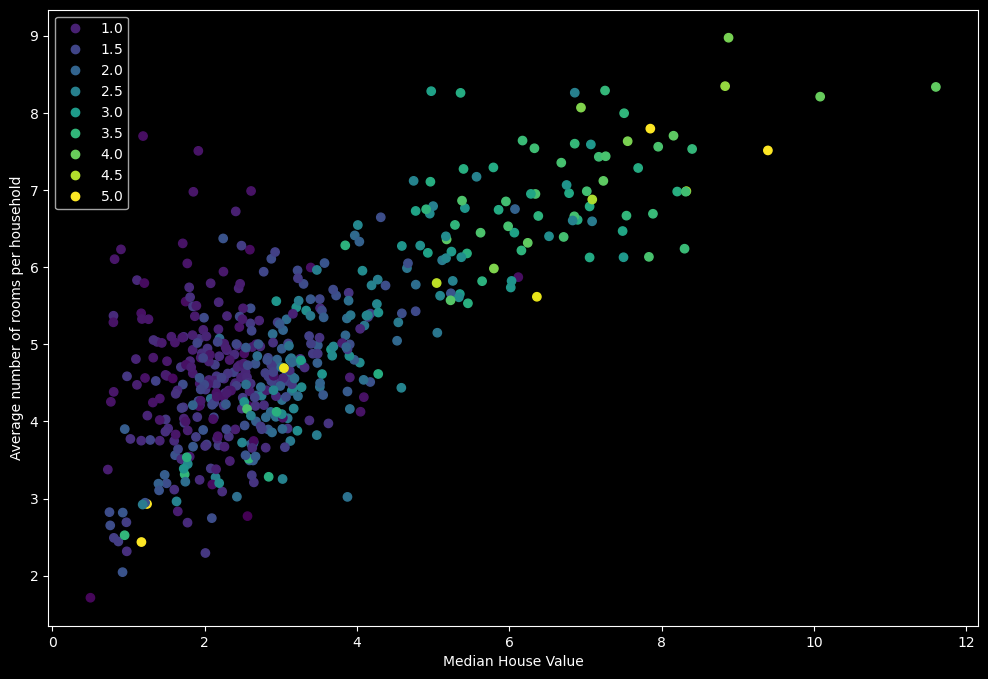

In [33]:
_, ax = plt.subplots(figsize=(12, 8))

ax_scatter = plt.scatter(second_df["MedInc"], second_df["AveRooms"], c=second_df["target"])
ax.legend(*ax_scatter.legend_elements())
ax.set(ylabel="Average number of rooms per household", xlabel="Median House Value");

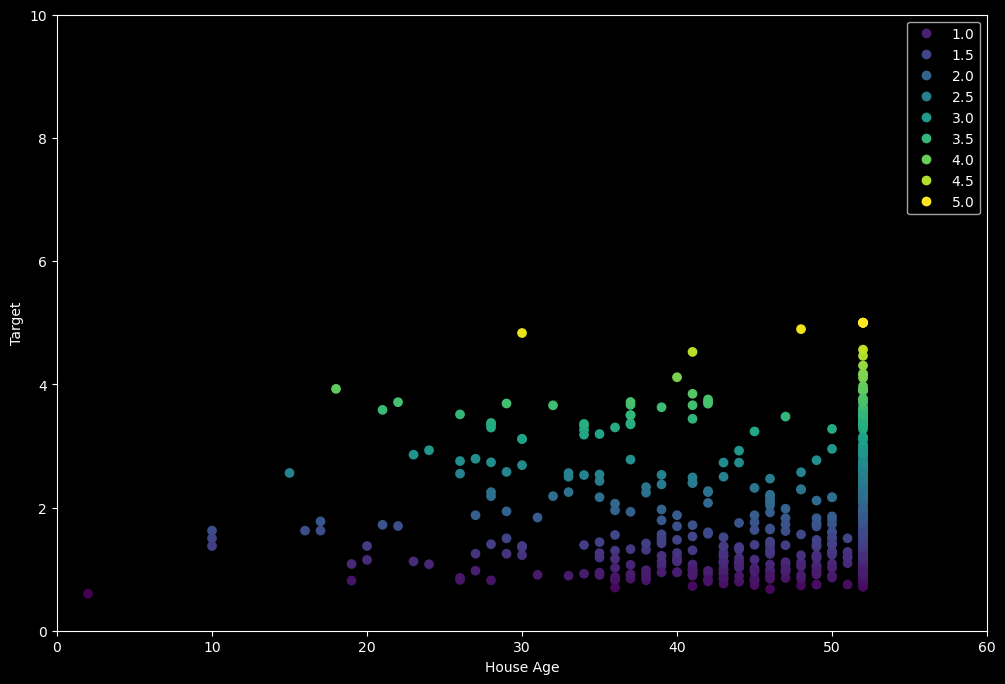

In [37]:
_, ax = plt.subplots(figsize=(12, 8))
ax_scatter = plt.scatter(second_df["HouseAge"], second_df["target"], c=second_df["target"])
ax.legend(*ax_scatter.legend_elements())
ax.set(xlabel="House Age", ylabel="Target", xlim=[0, 60], ylim=[0, 10]);